## Root finding

The following dichotomy function performs both the **dichotomy** (`split='even'`) and
**Lagrange** `(split='lagrange'`) method. We also define the **Newton** method.

Note that we use the same stopping criterion for all, i.e. $f(m) < \epsilon$, where $m$ is the current iterate

In [10]:
from math import fabs

def dichotomy(f, a, b, epsilon=1e-4, split='even', max_iter=100):
    assert(a < b)
    assert(f(a) * f(b) < 0)
    assert(split in ['even', 'lagrange'])
    m = 1
    n_iter = 0
    while(fabs(f(m)) > epsilon and n_iter < max_iter):
        if split == 'even':
            m = (a + b) / 2
        else: # split == 'lagrange'
            m = a + (a - b) * f(a) / (f(b) - f(a))
        if f(m) * f(a) < 0:
            b = m
        else:
            a = m
        n_iter += 1
    return m, n_iter

def newton(f, fprime, a, b, epsilon=1e-4, max_iter=100):
    assert(a < b)
    assert(f(a) * f(b) < 0)
    x = (a + b) / 2
    n_iter = 0
    while(fabs(f(x)) > epsilon and n_iter < max_iter):
        assert(fprime(x) != 0)
        x -= f(x) / fprime(x)
        n_iter += 1
    return x, n_iter

Let's define functions to test our methods

In [11]:
from math import cos, sin, cosh, sinh

def f(x):
    return cos(x) - x

def fprime(x):
    return - sin(x) - 1

def g(x, gamma):
    return cosh(x) + cos(x) - gamma

def gprime(x, gamma):
    return sinh(x) - sin(x)

We first plot these functions

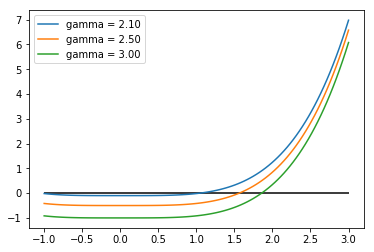

In [26]:
from functools import partial  # A handy shortcut
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

a = - 1
b = 3
for gamma in [2.1, 2.5, 3]:
    h = partial(g, gamma=gamma)
    hprime = partial(gprime, gamma=gamma)
    xs = np.linspace(a, b, 100)
    ys = list(map(h, xs))
    plt.plot(xs, ys, label='gamma = %.2f' % gamma)
plt.hlines(0, a, b)
plt.legend()


Let us now try the three root finding algorithms on these functions

In [29]:
a, b = 0.1, 3
for gamma in [2.01, 2.1, 2.5, 3]:
    print('Using g function with gamma = %f' % gamma)
    h = partial(g, gamma=gamma)
    hprime = partial(gprime, gamma=gamma)
    for split in ['even', 'lagrange']:
        m, n_iter = dichotomy(h, a, b, epsilon=1e-8, split=split)
        print('Dichotomy, split %s: m = %f, f(m) = %f, n_iter = % i' % (split, m, h(m), n_iter))
    m, n_iter = newton(h, hprime, a, b, epsilon=1e-8)
    print('Newton: m = %f, f(m) = %f, n_iter = % i' % (m, h(m), n_iter))

Using g function with gamma = 2.010000
Dichotomy, split even: m = 0.588556, f(m) = 0.000000, n_iter =  20
Dichotomy, split lagrange: m = 0.447244, f(m) = -0.006666, n_iter =  100
Newton: m = 0.588556, f(m) = 0.000000, n_iter =  7
Using g function with gamma = 2.100000
Dichotomy, split even: m = 1.046448, f(m) = 0.000000, n_iter =  23
Dichotomy, split lagrange: m = 1.046404, f(m) = -0.000017, n_iter =  100
Newton: m = 1.046448, f(m) = 0.000000, n_iter =  5
Using g function with gamma = 2.500000
Dichotomy, split even: m = 1.563695, f(m) = 0.000000, n_iter =  26
Dichotomy, split lagrange: m = 1.563695, f(m) = -0.000000, n_iter =  62
Newton: m = 1.563695, f(m) = 0.000000, n_iter =  3
Using g function with gamma = 3.000000
Dichotomy, split even: m = 1.857921, f(m) = -0.000000, n_iter =  23
Dichotomy, split lagrange: m = 1.857921, f(m) = -0.000000, n_iter =  40
Newton: m = 1.857921, f(m) = 0.000000, n_iter =  4


We observe that with `gamma` close to `2`, the `lagrange` method does not work very well !